In [2]:
# Ignore this block -- it's for the documentation build
try:
    import os, sys
    sys.path.insert(1, os.path.abspath('/home/runner/work/psi4/psi4/code/objdir/stage//usr/local/psi4/lib/'))
except ImportError:
    pass

import psi4
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [17]:
%%time
#! Sample HF/cc-pVDZ H2O Computation
psi4.core.set_output_file('H2Ooutput.dat', False)
psi4.set_memory('500 MB')

h2o = psi4.geometry("""
O
H 1 0.96
H 1 0.96 2 104.5
""")

psi4.energy('scf/cc-pvdz')

CPU times: user 314 ms, sys: 44.6 ms, total: 358 ms
Wall time: 9.12 s


-76.0266327350902

In [18]:
%%time
#! Sample UHF/6-31G** CH2 Computation
psi4.core.set_output_file('CH2output.dat', False)
R = 1.075
A = 133.93

ch2 = psi4.geometry("""
0 3
C
H 1 {0}
H 1 {0} 2 {1}
""".format(R, A)
)

psi4.set_options({'reference': 'uhf'})
psi4.energy('scf/6-31g**')

CPU times: user 291 ms, sys: 17.8 ms, total: 309 ms
Wall time: 448 ms


-38.92533462893707

In [19]:
%%time
psi4.core.set_output_file('H2O_3_output.dat', False)
psi4.set_options({'reference': 'rhf'})
psi4.optimize('scf/cc-pvdz', molecule=h2o)

Optimizer: Optimization complete!
CPU times: user 883 ms, sys: 40.2 ms, total: 923 ms
Wall time: 32.6 s


-76.02703272937481

In [20]:
%%time
psi4.core.set_output_file('H2O_frequency_output.dat', False)
scf_e, scf_wfn = psi4.frequency('scf/cc-pvdz', molecule=h2o, return_wfn=True)

CPU times: user 1.02 s, sys: 30.8 ms, total: 1.05 s
Wall time: 1.2 s


In [21]:
%%time
psi4.core.set_output_file('Analysis_output.dat', False)
# Example SAPT computation for ethene*ethyne (*i.e.*, ethylene*acetylene).
# Test case 16 from S22 Database

dimer = psi4.geometry("""
0 1
C   0.000000  -0.667578  -2.124659
C   0.000000   0.667578  -2.124659
H   0.923621  -1.232253  -2.126185
H  -0.923621  -1.232253  -2.126185
H  -0.923621   1.232253  -2.126185
H   0.923621   1.232253  -2.126185
--
0 1
C   0.000000   0.000000   2.900503
C   0.000000   0.000000   1.693240
H   0.000000   0.000000   0.627352
H   0.000000   0.000000   3.963929
units angstrom
""")

CPU times: user 1.31 ms, sys: 0 ns, total: 1.31 ms
Wall time: 2.66 ms


In [22]:
%%time
psi4.core.set_output_file('Ne_output.dat', False)
#! Example potential energy surface scan and CP-correction for Ne2

ne2_geometry = """
Ne
--
Ne 1 {0}
"""

Rvals = [2.5, 3.0, 4.0]

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ne2 = psi4.geometry(ne2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ne2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            2.5                        0.757716
            3.0                        0.015685
            4.0                        -0.016266
CPU times: user 6.05 s, sys: 1.5 s, total: 7.55 s
Wall time: 13.7 s


In [23]:
%%time
import numpy

psi4.core.set_output_file('Ar_output.dat', False)
ar2_geometry = """
Ar
--
Ar 1 {0}
"""

Rvals = numpy.arange(3.5, 6, 0.25) 

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ar2 = psi4.geometry(ar2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ar2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            3.5                        0.168852
            3.8                        -0.069952
            4.0                        -0.123122
            4.2                        -0.116537
            4.5                        -0.095162
            4.8                        -0.073663
            5.0                        -0.055927
            5.2                        -0.042277
            5.5                        -0.032054
            5.8                        -0.024469
CPU times: user 1min 28s, sys: 5.95 s, total: 1min 34s
Wall time: 3min 54s


In [4]:
Energy=[0.168852,0.069952,-0.123122,-0.116537,-0.095162, -0.073663,-0.055927,-0.042277,-0.032054,-0.024469]
Rvals=[3.5,3.75,4.0,4.25,4.5,4.75,5.0,5.25,5.5,5.75]

In [5]:
# define the LJ potential
def lj(r,sigma,eps):
    return 4*eps*((sigma/r)**12-(sigma/r)**6)

[3.69999794 0.08996612]


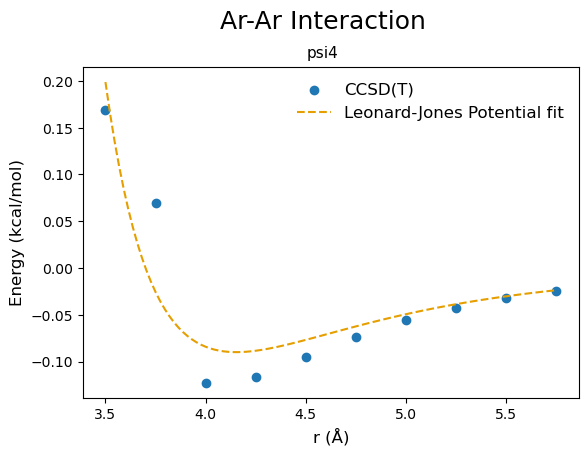

In [7]:
# figure 1  -  energy vs r
fig = plt.figure()
# scatter plot
plt.scatter(Rvals,Energy,label='CCSD(T)')
# fit
popt, pcov = curve_fit(lj, Rvals, Energy, p0 = [4,1.2])

print (popt)
# plot fit, dashed line, colorblind friendly, red 
r = np.linspace(3.5,5.75,100)
plt.plot(r,lj(r,*popt),'--',color='#E69F00',label='Leonard-Jones Potential fit')

# labels, x unit is angstrom, y unit is kcal/mol
plt.xlabel('r (Å)',fontsize=12)
plt.ylabel('Energy (kcal/mol)',fontsize=12)
# legend
plt.legend(frameon=False,fontsize=12)

# two lines of title
plt.text(x=0.5, y=0.88, s="Ar-Ar Interaction", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "psi4", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
